In [208]:
import random, math
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection

In [137]:
def geraIndividuo(tamCromossomo):
    
    cromossomo = []
    
    while tamCromossomo > 0:
        cromossomo.append(random.randint(0,1))
        tamCromossomo -= 1
        
    return cromossomo

In [156]:
def geraPopulacao(tamPop, tamCromossomo):
    
    populacao = []
    
    while tamPop > 0:
        populacao.append(geraIndividuo(tamCromossomo))
        tamPop -= 1

    return populacao

In [139]:
#argumentos: recebe array binario do cromossomo (geraPopulacao[i])
#retorna: o valor real x e y do cromossomo

def cromossomoReal(cromossomo):
    
    x = 0
    y = 0
    i = 0
    
    while(i < len(cromossomo)/2):
        x += cromossomo[i] * pow(2, len(cromossomo)/2-i-1)
        i += 1
        
    while(i < len(cromossomo)):
        y += cromossomo[i] * pow(2, len(cromossomo)-i-1)
        i += 1

    return [x,y]

In [140]:
#argumentos: recebe um valor real e o tamanho do cromossomo (len(geraPopulacao[i]))
#retorna: o valor real x e y do cromossomo dentro do intervalo da funcao

def valorNoIntervalo(a, cromossomoLength):
    
    a = -5.12 + (10.24 / (pow(2,cromossomoLength / 2) - 1) * a)
    
    return a

In [141]:
#argumentos: recebe um cromossomo
#retorna: o valor real fitness do individuo

def fitness(cromossomo):
    
    valorReal = cromossomoReal(cromossomo)
    x = valorNoIntervalo(valorReal[0], len(cromossomo))
    y = valorNoIntervalo(valorReal[1], len(cromossomo))
    cosx = math.cos(2 * math.pi * x)
    cosy = math.cos(2 * math.pi * y)
    
    resultado = 1/(20 + pow(x,2) + pow(y,2) - 10*(cosx+cosy))
    
    return resultado

In [142]:
#argumentos: a populacao toda
#retorna: o cromossomo de um individuo

def selecao(pop):
    
    fitnessAcumulado = []
    fitnessTotal = 0
    
    for i in pop:
        fitnessAtual = fitness(i)
        fitnessTotal += fitnessAtual
        fitnessAcumulado.append(fitnessTotal)
    
    selecionar = random.random()*fitnessTotal
    
    j = 0
    while(j < len(pop)):
        if(fitnessAcumulado[j] >= selecionar):
            return pop[j]
        else:
            j += 1

In [143]:
#argumentos: dois cromossomos (selecao(pop))
#retorno: um array contendo dois cromossomos

def crossover(pai, mae):
    
    ponto = random.randint(1,len(pai)-1)
    i = 0
    filhos = []
    filhoUm = []
    filhoDois = []
    
    while(i < len(pai)):
        if(i < ponto):
            filhoUm.append(pai[i])
            filhoDois.append(mae[i])
        else:
            filhoUm.append(mae[i])
            filhoDois.append(pai[i])
        i += 1
        
    filhos.append(filhoUm)
    filhos.append(filhoDois)
    
    return filhos

In [160]:
#argumentos: um cromossomo
#retorno: um cromossomo 

def mutacao(cromossomo):
    
    r = random.randint(0,len(cromossomo)-1)
    
    if(cromossomo[r] == 1):
        cromossomo[r] = 0
    else:
        cromossomo[r] = 1
        
    return cromossomo

In [145]:
#argumentos: recebe uma populacao e a chance de mutacao
#retorno: uma nova populacao

def novaGeracao(pop, chanceMutacao):
    
    novaPop = []
    
    while(len(novaPop) < len(pop)):
        r = random.random()
        
        if(r <= chanceMutacao):
            novaPop.append(mutacao(selecao(pop)))
            
        else:
            filhos = crossover(selecao(pop), selecao(pop))
            novaPop.append(filhos[0])
            if(len(novaPop) < len(pop)):
                novaPop.append(filhos[1])
        
    return novaPop

In [146]:
#argumentos: recebe uma populacao
#retorno: o fitness medio dessa populacao

def fitnessGeracao(pop):
    
    fitnessGeracao = 0
    i = 0
    
    for i in pop:
        fitnessGeracao += fitness(i)
    
    return fitnessGeracao/len(pop)

In [147]:
#argumentos: receve uma populacao
#retorno: o maior fitness obtido nessa populacao

def maiorFitness(pop):
    
    maior = 0
    
    for i in pop:
        atual = fitness(pop[i])
        
        if(maior < atual):
            maior = atual
    
    return maior

In [243]:
#argumentos: recebe o numero de geracoes a serem rodadas, o tamanho da populacao, o tamanho do cromossomo (numero par),
#a chance de mutacao (decimal) e prints sobre o status da execucao (True ou False)
#retorno: 

def rodaGeracoes(numGen, tamPop, tamCromossomo, chanceMutacao, verbose):
    
    resultado = []
    
    pop = geraPopulacao(tamPop, tamCromossomo)
    i = 0
    melhor = 0
    maiorCromossomo = []
    maiorGen = 0
    
    while(i < numGen):
        j = 0
        for j in pop:
            fitAtual = fitness(j)
            if(fitAtual > melhor):
                if(verbose == True): print("Novo maior fitness (gen", i, ')', fitAtual, 'Antigo:', melhor)
                melhor = fitAtual
                maiorGen = i
                maiorCromossomo = j
        
        medio = fitnessGeracao(pop)
        resultAux = [melhor, medio]
        resultado.append(resultAux)
        
        if(verbose == True): print('Gen', i, 'Melhor fitness:', melhor, 'Fitness medio:', medio)
        pop = novaGeracao(pop, chanceMutacao)
        i += 1
        
    return resultado

In [277]:
def plotarGrafico(geracoes):

    x = []
    y_melhor = []
    y_medio = []

    i = 0
    while(i < len(geracoes)):
        x.append(i)
        y_melhor.append(geracoes[i][0])
        y_medio.append(geracoes[i][1])
        i += 1

    l = plt.plot(x, y_melhor, 'r.:', x, y_medio, 'k.:')
    
    ax.set_xlim([0, len(geracoes)])
    ax.set_ylim([0, 100])
    
    plt.ylabel('Fitness')
    plt.xlabel('Geracao')

    plt.show()

Novo maior fitness (gen 0 ) 0.016531723107411165 Antigo: 0
Novo maior fitness (gen 0 ) 0.02708974955448736 Antigo: 0.016531723107411165
Novo maior fitness (gen 0 ) 0.0590088537663874 Antigo: 0.02708974955448736
Novo maior fitness (gen 0 ) 0.10971598284336688 Antigo: 0.0590088537663874
Novo maior fitness (gen 0 ) 0.20591299360637894 Antigo: 0.10971598284336688
Gen 0 Melhor fitness: 0.20591299360637894 Fitness medio: 0.034503836364462075
Novo maior fitness (gen 1 ) 0.42749495961406386 Antigo: 0.20591299360637894
Gen 1 Melhor fitness: 0.42749495961406386 Fitness medio: 0.05489723628737041
Novo maior fitness (gen 2 ) 0.4850664462339119 Antigo: 0.42749495961406386
Gen 2 Melhor fitness: 0.4850664462339119 Fitness medio: 0.09232360384388467
Novo maior fitness (gen 3 ) 0.5198626690068454 Antigo: 0.4850664462339119
Gen 3 Melhor fitness: 0.5198626690068454 Fitness medio: 0.14807795900327972
Novo maior fitness (gen 4 ) 0.6886103685321152 Antigo: 0.5198626690068454
Novo maior fitness (gen 4 ) 0.75

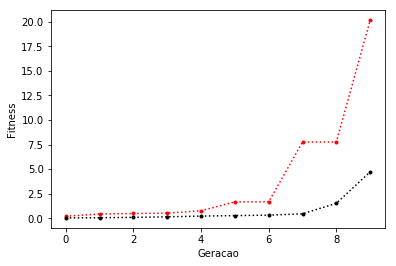

In [280]:
geracoes = rodaGeracoes(10, 100, 20, 0.1, True)
plotarGrafico(geracoes)